In [1]:
# This gist contains a direct connection to a local PostgreSQL database
# called "suppliers" where the username and password parameters are "postgres"

# This code is adapted from the tutorial hosted below:
# http://www.postgresqltutorial.com/postgresql-python/connect/

import psycopg2
import pandas as pd
# Establish a connection to the database by creating a cursor object
# The PostgreSQL server must be accessed through the PostgreSQL APP or Terminal Shell

# conn = psycopg2.connect("dbname=suppliers port=5432 user=postgres password=postgres")

# Or:
conn = psycopg2.connect(host="localhost", port = 5432, database="ecommerce", user="postgres", password="b197eas")

# Create a cursor object
cur = conn.cursor()

# A sample query of all data from the "vendors" table in the "suppliers" database
cur.execute("""SELECT * FROM public.feedback LIMIT 5""")
query_results = cur.fetchall()
print(query_results)

# # Close the cursor and connection to so the server can allocate
# # bandwidth to other requests
# cur.close()
# conn.close()

[('7bc2406110b926393aa56f80a40eba40', '73fc7af87114b39712e6da79b0a377eb', 4, datetime.datetime(2018, 1, 18, 0, 0), datetime.datetime(2018, 1, 18, 21, 46, 59)), ('80e641a11e56f04c1ad469d5645fdfde', 'a548910a1c6147796b98fdf73dbeba33', 5, datetime.datetime(2018, 3, 10, 0, 0), datetime.datetime(2018, 3, 11, 3, 5, 13)), ('228ce5500dc1d8e020d8d1322874b6f0', 'f9e4b658b201a9f2ecdecbb34bed034b', 5, datetime.datetime(2018, 2, 17, 0, 0), datetime.datetime(2018, 2, 18, 14, 36, 24)), ('e64fb393e7b32834bb789ff8bb30750e', '658677c97b385a9be170737859d3511b', 5, datetime.datetime(2017, 4, 21, 0, 0), datetime.datetime(2017, 4, 21, 22, 2, 6)), ('f7c4243c7fe1938f181bec41a392bdeb', '8e6bfb81e283fa7e4f11123a3fb894f1', 5, datetime.datetime(2018, 3, 1, 0, 0), datetime.datetime(2018, 3, 2, 10, 26, 53))]


In [2]:
#Example to use put query results into pandas df
import pandas as pd
cur.execute("""SELECT * FROM public.feedback""")
query_results = cur.fetchall()
df = pd.DataFrame (query_results, columns =['feedback_id','order_id','score','sent_date','ans_date'])
df.head()

,feedback_id,order_id,score,sent_date,ans_date
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01,2018-03-02 10:26:53


## RFM Analysis

In [3]:
# Recency Analysis
cur.execute("""SELECT * FROM datamarts.rfm""")
query_results = cur.fetchall()
df = pd.DataFrame (query_results, columns =['user_name','order_frequency','order_recency','order_monetary','date_key'])
df

,user_name,order_frequency,order_recency,order_monetary,date_key
0,0037eb1ff742ee2e71ba887f65f3c6f3,1,2017-07-13,199000,20170713
1,003800162424b7b5b3d75c9cf22a66e7,1,2018-04-01,85500,20180401
2,00391594070baf8603f5fdc1d0c6a48c,1,2018-08-05,105000,20180805
3,003c457932a554e4df13834237b1ed00,1,2018-01-05,129900,20180105
4,003db7adfcdc49857b095a50191b6c9d,1,2018-05-02,524900,20180502
...,...,...,...,...,...
95415,ffe9e41fbd14db4a7361347c56af5447,1,2018-02-11,199000,20180211
95416,ffebb6424578e7bb153322da9d65634f,1,2017-01-16,629000,20170116
95417,fff3a9369e4b7102fab406a334a678c3,1,2017-08-11,84900,20170811
95418,fffcf5a5ff07b0908bd4e2dbc735a684,1,2017-06-08,1570000,20170608


In [4]:
cur.execute("""select max(order_recency) 
from datamarts.rfm r """)
query_results = cur.fetchall()
print("Max order date:")
print(query_results)

Max order date:
[(datetime.date(2018, 9, 3),)]


In [5]:
cur.execute("""select min(order_recency) 
from datamarts.rfm r """)
query_results = cur.fetchall()
print("Min order date:")
print(query_results)

Min order date:
[(datetime.date(2016, 9, 4),)]


In [6]:
# Recency Analysis where order is 2018
cur.execute("""select * 
from datamarts.rfm r 
where order_recency < '2017-01-01' and order_recency >= '2016-01-01'
""")
query_results = cur.fetchall()
df1 = pd.DataFrame (query_results, columns =['user_name','order_frequency','order_recency','order_monetary', 'date_key'])
df1

,user_name,order_frequency,order_recency,order_monetary,date_key
0,0829f7df6577d5a4b65439bea701405f,1,2016-10-04,249900,20161004
1,0922f37485310929b1b94e8f0c984ca5,1,2016-10-06,139990,20161006
2,0d527a050dc34913c5c4746cefae5995,1,2016-10-07,58000,20161007
3,0ecf7f65b5ff3b9e61b637e59f495e0a,2,2016-10-10,126690,20161010
4,1c5aefec1a2943edd15e52f9e2900e41,1,2016-10-09,129970,20161009
...,...,...,...,...,...
294,fdaa290acb9eeacb66fa7f979baa6803,1,2016-10-08,1399000,20161008
295,ff39ae410be7f9b3a2457c546c6f67de,1,2016-10-05,79900,20161005
296,ff68ad2883e793597f1c343dd6505f5d,1,2016-10-06,499800,20161006
297,ff822e5e1322cef6c211ad8a0591999e,1,2016-10-08,15900,20161008


In [7]:
cur.execute("""select avg(order_monetary_value) from datamarts.rfm r """)
query_results = cur.fetchall()
print("Average order value: ")
print(query_results)

Average order value: 
[(Decimal('142440.198071683085'),)]


In [8]:
# Order Frequency Analysis
cur.execute("""select count(user_name) from datamarts.rfm r where order_frequency = 1 """)
query_results = cur.fetchall()
print("Number of User with 1 Order only : ")
print(query_results)

Number of User with 1 Order only : 
[(92507,)]


In [9]:
# Order Frequency Analysis
cur.execute("""select count(user_name) from datamarts.rfm r where order_frequency > 1 """)
query_results = cur.fetchall()
print("Number of User with > 1 Order : ")
print(query_results)

Number of User with > 1 Order : 
[(2913,)]


In [10]:
# Order Frequency Analysis
cur.execute("""select count(user_name) from datamarts.rfm r """)
query_results = cur.fetchall()
print("Number of User with > 1 Order : ")
print(query_results)

Number of User with > 1 Order : 
[(95420,)]


In [11]:
print ("% of user with > 1 order:",2913/95420,"%")
print ("% of user with 1 order:",92507/95420,"%")

% of user with > 1 order: 0.030528191154894153 %
% of user with 1 order: 0.9694718088451059 %


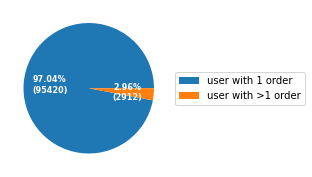

In [12]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["95420 user with 1 order",
          "2913 user with >1 order",
          ]

data = [float(x.split()[0]) for x in recipe]
ingredients = ['user with 1 order',"user with >1 order" ]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

plt.show()

In [13]:

cur.execute("""select user_name from datamarts.rfm r where order_frequency > 1 and order_recency >= '2018-01-01'""")
query_results = cur.fetchall()
tempdf = pd.DataFrame (query_results, columns =['user_name'])
tempdf

,user_name
0,012452d40dafae4df401bced74cdb490
1,01f2285f85a1c603eb7ef755ad311769
2,02b20b7c813efede140142ac610e36dc
3,02fbe4db886eb98774c8ba300d39fa79
4,035e7cd88b7450fd33efeca817081a53
...,...
1739,fc2261ae2c583aa2e68241456a6467c8
1740,fc24db02becd484accefaa5af59c18b1
1741,fcd0ab79592faab19e2bf386cf69fbcd
1742,fde381fe79993303957d1fcf9cd6bf4a


In [ ]:
# Average order value 
cur.execute("""select avg(order_monetary_value) from datamarts.rfm r where order_frequency > 1 """)
query_results = cur.fetchall()
print("Average Order Value for User with > 1 order : ")
print(query_results)

In [13]:
# Average order value 
cur.execute("""select avg(order_monetary_value) from datamarts.rfm r where order_frequency = 1 """)
query_results = cur.fetchall()
print("Average Order Value for User with 1 order : ")
print(query_results)

Average Order Value for User with 1 order : 
[(Decimal('138674.390478558379'),)]


In [14]:
# Average order value 
cur.execute("""
select *
from datamarts.rfm r
order by order_monetary_value desc
limit 19084
""")
query_results = cur.fetchall()
top20df = pd.DataFrame (query_results, columns =['user_name','order_frequency','order_recency','order_monetary', 'date_key'])
top20df

,user_name,order_frequency,order_recency,order_monetary,date_key
0,0a0a92112bd4c708ca5fde585afaa872,1,2017-09-29,13440000,20170929
1,da122df9eeddfedc1dc1f5349a1a690c,2,2017-04-01,7388000,20170401
2,763c8b1c9c68a0229c42c9fc6f662b93,1,2018-07-15,7160000,20180715
3,dc4802a71eae9be1dd28f5d788ceb526,1,2017-02-12,6735000,20170212
4,459bef486812aa25204be022145caa62,1,2018-07-25,6729000,20180725
...,...,...,...,...,...
19079,3e96f7cfd9c043c89aecca562c25b303,1,2018-06-11,179900,20180611
19080,5950eb8fef0ee900da7fb4809ed0dd4a,1,2018-05-22,179900,20180522
19081,7b9d5dcb4899a5d6a40c657824131ba2,1,2018-04-04,179900,20180404
19082,338793650dd90ba06a20bb0793d0f3de,1,2018-08-07,179900,20180807


In [15]:
from pandasql import sqldf
output = sqldf("select count(user_name) from top20df where order_frequency = 1")
print("Number of user with 1 order (in top 20$): ")
output

Number of user with 1 order (in top 20$): 


,count(user_name)
0,17611


In [16]:
output2 = sqldf("select count(user_name) from top20df where order_frequency > 1")
print("Number of user with > 1 order (in top 20$): ")
output2

Number of user with > 1 order (in top 20$): 


,count(user_name)
0,1473


### RFM Analysis

In [17]:
# copy dataframe
segment_df = df
segment_df

,user_name,order_frequency,order_recency,order_monetary,date_key
0,0037eb1ff742ee2e71ba887f65f3c6f3,1,2017-07-13,199000,20170713
1,003800162424b7b5b3d75c9cf22a66e7,1,2018-04-01,85500,20180401
2,00391594070baf8603f5fdc1d0c6a48c,1,2018-08-05,105000,20180805
3,003c457932a554e4df13834237b1ed00,1,2018-01-05,129900,20180105
4,003db7adfcdc49857b095a50191b6c9d,1,2018-05-02,524900,20180502
...,...,...,...,...,...
95415,ffe9e41fbd14db4a7361347c56af5447,1,2018-02-11,199000,20180211
95416,ffebb6424578e7bb153322da9d65634f,1,2017-01-16,629000,20170116
95417,fff3a9369e4b7102fab406a334a678c3,1,2017-08-11,84900,20170811
95418,fffcf5a5ff07b0908bd4e2dbc735a684,1,2017-06-08,1570000,20170608


In [18]:
f_labels = [1,2]
f_groups = segment_df.order_frequency.quantile([0.25,0.5,0.75])

In [19]:
f_groups

0.25    1.0
0.50    1.0
0.75    1.0
Name: order_frequency, dtype: float64

#### Ranking them based on each RFM attribute separately
Ranked based on each attribute from 1 - 5 

### Frequency

In [20]:
segment_df['order_frequency'].value_counts()

1     92507
2      2673
3       192
4        29
5         9
6         5
7         3
9         1
16        1
Name: order_frequency, dtype: int64

<AxesSubplot:>

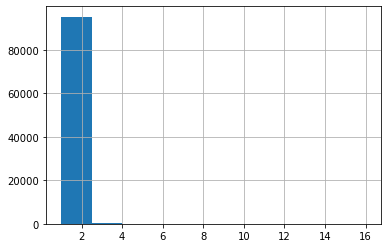

In [21]:
segment_df['order_frequency'].hist()

In [22]:
new_segment_df = segment_df

In [23]:
new_segment_df['order_frequency'].value_counts()

1     92507
2      2673
3       192
4        29
5         9
6         5
7         3
9         1
16        1
Name: order_frequency, dtype: int64

In [24]:
# Freq - score
#   1 - 1
#   2 - 2
#   3 - 3
# >=4 - 4

new_segment_df.loc[new_segment_df['order_frequency'] >= 1, 'frequency_score'] = 1
new_segment_df.loc[new_segment_df['order_frequency'] > 1, 'frequency_score'] = 2
new_segment_df.loc[new_segment_df['order_frequency'] > 2, 'frequency_score'] = 3
new_segment_df.loc[new_segment_df['order_frequency'] > 3, 'frequency_score'] = 4

In [25]:
new_segment_df

,user_name,order_frequency,order_recency,order_monetary,date_key,frequency_score
0,0037eb1ff742ee2e71ba887f65f3c6f3,1,2017-07-13,199000,20170713,1.0
1,003800162424b7b5b3d75c9cf22a66e7,1,2018-04-01,85500,20180401,1.0
2,00391594070baf8603f5fdc1d0c6a48c,1,2018-08-05,105000,20180805,1.0
3,003c457932a554e4df13834237b1ed00,1,2018-01-05,129900,20180105,1.0
4,003db7adfcdc49857b095a50191b6c9d,1,2018-05-02,524900,20180502,1.0
...,...,...,...,...,...,...
95415,ffe9e41fbd14db4a7361347c56af5447,1,2018-02-11,199000,20180211,1.0
95416,ffebb6424578e7bb153322da9d65634f,1,2017-01-16,629000,20170116,1.0
95417,fff3a9369e4b7102fab406a334a678c3,1,2017-08-11,84900,20170811,1.0
95418,fffcf5a5ff07b0908bd4e2dbc735a684,1,2017-06-08,1570000,20170608,1.0


### Recency Rank


In [26]:
# Recency Rank 
# the top 20% of customers receive a recency score of 5, the next 20% a score of 4, and so on

recency_rank = new_segment_df
recency_rank

,user_name,order_frequency,order_recency,order_monetary,date_key,frequency_score
0,0037eb1ff742ee2e71ba887f65f3c6f3,1,2017-07-13,199000,20170713,1.0
1,003800162424b7b5b3d75c9cf22a66e7,1,2018-04-01,85500,20180401,1.0
2,00391594070baf8603f5fdc1d0c6a48c,1,2018-08-05,105000,20180805,1.0
3,003c457932a554e4df13834237b1ed00,1,2018-01-05,129900,20180105,1.0
4,003db7adfcdc49857b095a50191b6c9d,1,2018-05-02,524900,20180502,1.0
...,...,...,...,...,...,...
95415,ffe9e41fbd14db4a7361347c56af5447,1,2018-02-11,199000,20180211,1.0
95416,ffebb6424578e7bb153322da9d65634f,1,2017-01-16,629000,20170116,1.0
95417,fff3a9369e4b7102fab406a334a678c3,1,2017-08-11,84900,20170811,1.0
95418,fffcf5a5ff07b0908bd4e2dbc735a684,1,2017-06-08,1570000,20170608,1.0


In [27]:
max_date = recency_rank['order_recency'].max()
recency_rank['recency'] = (max_date - recency_rank['order_recency']).dt.days
recency_rank

,user_name,order_frequency,order_recency,order_monetary,date_key,frequency_score,recency
0,0037eb1ff742ee2e71ba887f65f3c6f3,1,2017-07-13,199000,20170713,1.0,417
1,003800162424b7b5b3d75c9cf22a66e7,1,2018-04-01,85500,20180401,1.0,155
2,00391594070baf8603f5fdc1d0c6a48c,1,2018-08-05,105000,20180805,1.0,29
3,003c457932a554e4df13834237b1ed00,1,2018-01-05,129900,20180105,1.0,241
4,003db7adfcdc49857b095a50191b6c9d,1,2018-05-02,524900,20180502,1.0,124
...,...,...,...,...,...,...,...
95415,ffe9e41fbd14db4a7361347c56af5447,1,2018-02-11,199000,20180211,1.0,204
95416,ffebb6424578e7bb153322da9d65634f,1,2017-01-16,629000,20170116,1.0,595
95417,fff3a9369e4b7102fab406a334a678c3,1,2017-08-11,84900,20170811,1.0,388
95418,fffcf5a5ff07b0908bd4e2dbc735a684,1,2017-06-08,1570000,20170608,1.0,452


<AxesSubplot:>

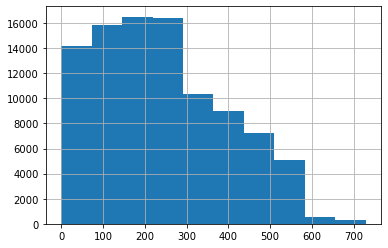

In [28]:
# Distribution Analysis
recency_rank['recency'].hist()

Text(0.5, 1.0, 'hist(t, bins="knuth")')

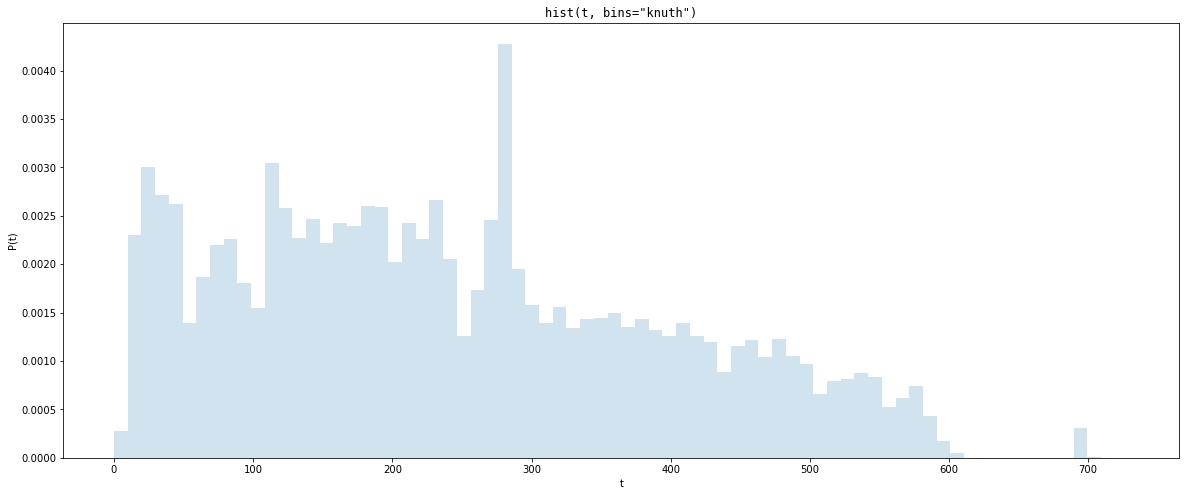

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import hist

t = recency_rank['recency']

# draw histograms with two different bin widths
fig, ax = plt.subplots(1, figsize=(20, 8))

hist(t, bins='knuth', histtype='stepfilled',
            alpha=0.2, density=True)
ax.set_xlabel('t')
ax.set_ylabel('P(t)')
ax.set_title(f'hist(t, bins="knuth")',
                    fontdict=dict(family='monospace'))

R:\Anaconda\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='recency'>

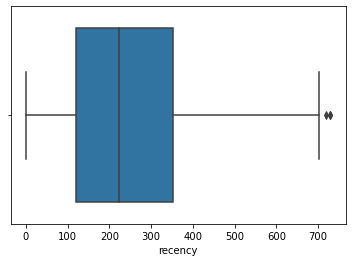

In [30]:
#Box Plot
import seaborn as sns
sns.boxplot(recency_rank['recency'])

In [31]:
# Mean Median
x = np.median(recency_rank['recency'])
y = np.mean(recency_rank['recency'])
print('median is:', x)
print('mean is: ', y)

median is: 224.0
mean is:  243.50145671766924


In [32]:
# Create the quartiles scores
quantiles = recency_rank.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles    
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [33]:
recency_rank['recency_score'] = recency_rank['recency'].apply(RScore, args=('recency',quantiles,))
recency_rank

,user_name,order_frequency,order_recency,order_monetary,date_key,frequency_score,recency,recency_score
0,0037eb1ff742ee2e71ba887f65f3c6f3,1,2017-07-13,199000,20170713,1.0,417,1
1,003800162424b7b5b3d75c9cf22a66e7,1,2018-04-01,85500,20180401,1.0,155,3
2,00391594070baf8603f5fdc1d0c6a48c,1,2018-08-05,105000,20180805,1.0,29,4
3,003c457932a554e4df13834237b1ed00,1,2018-01-05,129900,20180105,1.0,241,2
4,003db7adfcdc49857b095a50191b6c9d,1,2018-05-02,524900,20180502,1.0,124,3
...,...,...,...,...,...,...,...,...
95415,ffe9e41fbd14db4a7361347c56af5447,1,2018-02-11,199000,20180211,1.0,204,3
95416,ffebb6424578e7bb153322da9d65634f,1,2017-01-16,629000,20170116,1.0,595,1
95417,fff3a9369e4b7102fab406a334a678c3,1,2017-08-11,84900,20170811,1.0,388,1
95418,fffcf5a5ff07b0908bd4e2dbc735a684,1,2017-06-08,1570000,20170608,1.0,452,1


In [34]:
recency_rank['recency_score'].value_counts()

3    23944
4    23894
2    23849
1    23733
Name: recency_score, dtype: int64

### Not Used 

In [35]:
# recency_rank.loc[recency_rank['RowNumber'] >= 1, 'recency_score'] = 5
# recency_rank

In [36]:
# recency_rank.loc[recency_rank['RowNumber'] > 19084, 'recency_score'] = 4
# recency_rank

In [37]:
# recency_rank.loc[recency_rank['RowNumber'] > 19084*2, 'recency_score'] = 3
# recency_rank.loc[recency_rank['RowNumber'] > 19084*3, 'recency_score'] = 2
# recency_rank.loc[recency_rank['RowNumber'] > 19084*4, 'recency_score'] = 1

In [38]:
# recency_rank

### Monetary

In [39]:
# Monetary Rank
monetary_rank = recency_rank
monetary_rank

,user_name,order_frequency,order_recency,order_monetary,date_key,frequency_score,recency,recency_score
0,0037eb1ff742ee2e71ba887f65f3c6f3,1,2017-07-13,199000,20170713,1.0,417,1
1,003800162424b7b5b3d75c9cf22a66e7,1,2018-04-01,85500,20180401,1.0,155,3
2,00391594070baf8603f5fdc1d0c6a48c,1,2018-08-05,105000,20180805,1.0,29,4
3,003c457932a554e4df13834237b1ed00,1,2018-01-05,129900,20180105,1.0,241,2
4,003db7adfcdc49857b095a50191b6c9d,1,2018-05-02,524900,20180502,1.0,124,3
...,...,...,...,...,...,...,...,...
95415,ffe9e41fbd14db4a7361347c56af5447,1,2018-02-11,199000,20180211,1.0,204,3
95416,ffebb6424578e7bb153322da9d65634f,1,2017-01-16,629000,20170116,1.0,595,1
95417,fff3a9369e4b7102fab406a334a678c3,1,2017-08-11,84900,20170811,1.0,388,1
95418,fffcf5a5ff07b0908bd4e2dbc735a684,1,2017-06-08,1570000,20170608,1.0,452,1


R:\Anaconda\envs\tf-gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='order_monetary', ylabel='Density'>

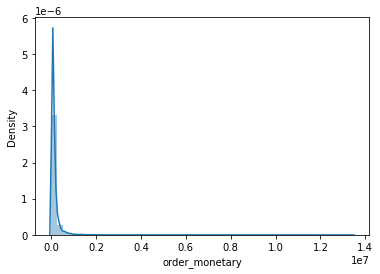

In [40]:
sns.distplot(monetary_rank['order_monetary'])

Text(0.5, 1.0, 'hist(t, bins="knuth")')

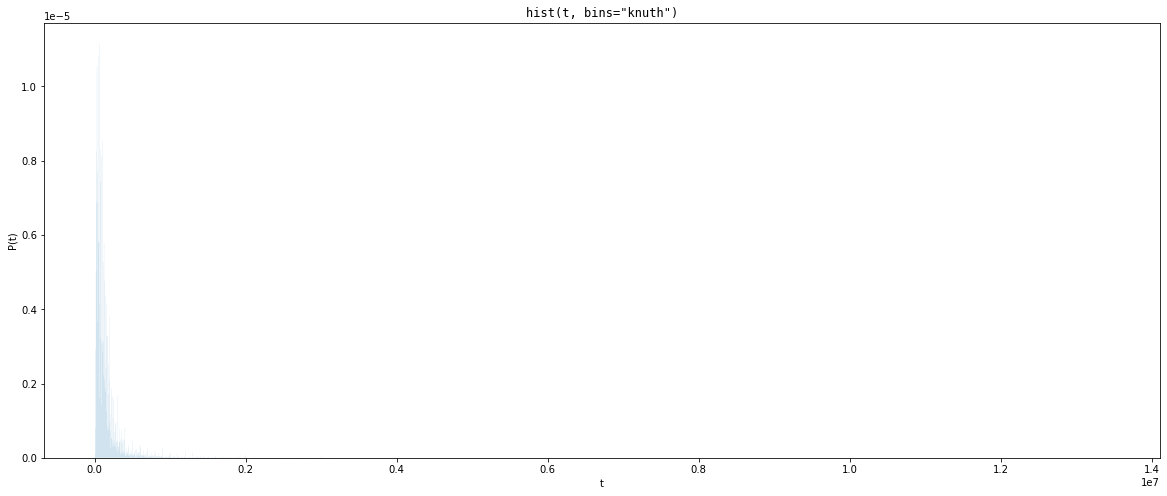

In [41]:
t = monetary_rank['order_monetary']

# draw histograms with two different bin widths
fig, ax = plt.subplots(1, figsize=(20, 8))

hist(t, bins='knuth', histtype='stepfilled',
            alpha=0.2, density=True)
ax.set_xlabel('t')
ax.set_ylabel('P(t)')
ax.set_title(f'hist(t, bins="knuth")',
                    fontdict=dict(family='monospace'))

R:\Anaconda\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='order_monetary'>

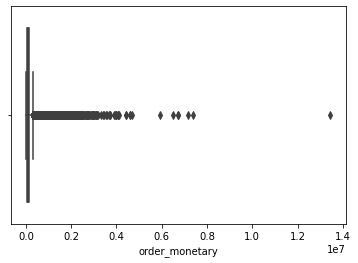

In [42]:
sns.boxplot(monetary_rank['order_monetary'])

R:\Anaconda\envs\tf-gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='order_monetary', ylabel='Density'>

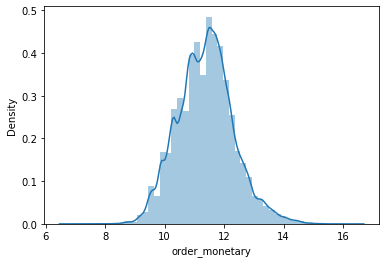

In [43]:
# Log Transform
monetary_rank_log = np.log(monetary_rank['order_monetary'])
sns.distplot(monetary_rank_log)

Text(0.5, 1.0, 'hist(t, bins="knuth")')

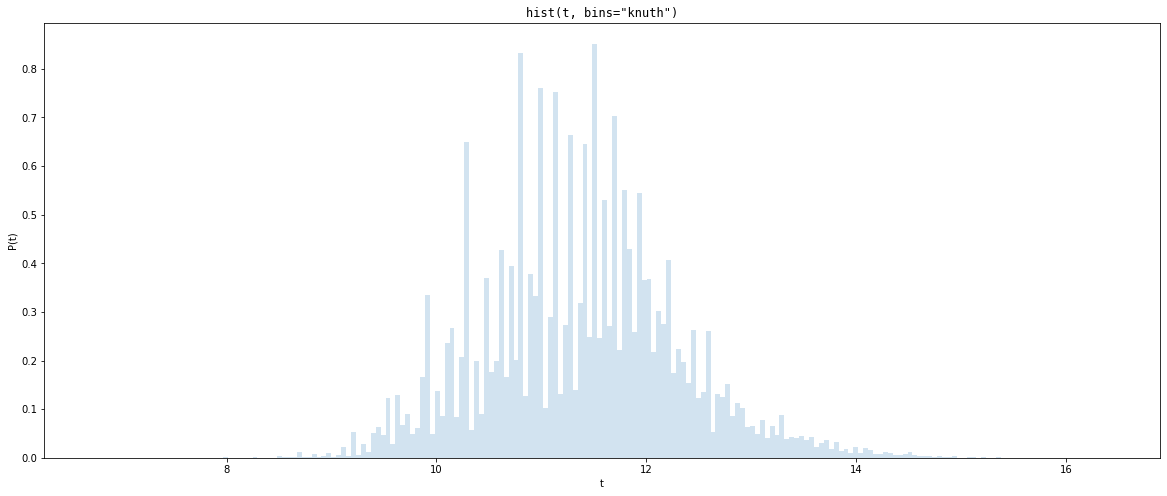

In [44]:
t = monetary_rank_log

# draw histograms with two different bin widths
fig, ax = plt.subplots(1, figsize=(20, 8))

hist(t, bins='knuth', histtype='stepfilled',
            alpha=0.2, density=True)
ax.set_xlabel('t')
ax.set_ylabel('P(t)')
ax.set_title(f'hist(t, bins="knuth")',
                    fontdict=dict(family='monospace'))

R:\Anaconda\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='order_monetary'>

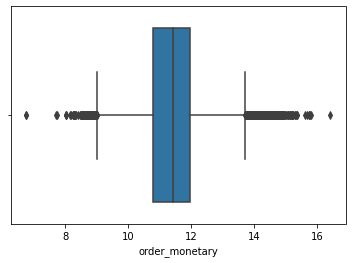

In [45]:
sns.boxplot(monetary_rank_log)

In [46]:
percentile25 = monetary_rank_log.quantile(0.25)
percentile75 = monetary_rank_log.quantile(0.75)
iqr = percentile75 - percentile25

In [47]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [48]:
monetary_rank['log m'] = monetary_rank_log

In [49]:
monetary_rank

,user_name,order_frequency,order_recency,order_monetary,date_key,frequency_score,recency,recency_score,log m
0,0037eb1ff742ee2e71ba887f65f3c6f3,1,2017-07-13,199000,20170713,1.0,417,1,12.201060
1,003800162424b7b5b3d75c9cf22a66e7,1,2018-04-01,85500,20180401,1.0,155,3,11.356272
2,00391594070baf8603f5fdc1d0c6a48c,1,2018-08-05,105000,20180805,1.0,29,4,11.561716
3,003c457932a554e4df13834237b1ed00,1,2018-01-05,129900,20180105,1.0,241,2,11.774520
4,003db7adfcdc49857b095a50191b6c9d,1,2018-05-02,524900,20180502,1.0,124,3,13.170963
...,...,...,...,...,...,...,...,...,...
95415,ffe9e41fbd14db4a7361347c56af5447,1,2018-02-11,199000,20180211,1.0,204,3,12.201060
95416,ffebb6424578e7bb153322da9d65634f,1,2017-01-16,629000,20170116,1.0,595,1,13.351887
95417,fff3a9369e4b7102fab406a334a678c3,1,2017-08-11,84900,20170811,1.0,388,1,11.349229
95418,fffcf5a5ff07b0908bd4e2dbc735a684,1,2017-06-08,1570000,20170608,1.0,452,1,14.266586


In [50]:
temp_m = monetary_rank

In [51]:
temp_m[temp_m['log m'] > upper_limit]
temp_m[temp_m['log m'] < lower_limit]

,user_name,order_frequency,order_recency,order_monetary,date_key,frequency_score,recency,recency_score,log m
259,0340c3b9ed45ab5dc6959d10651775fc,1,2017-09-12,7000,20170912,1.0,356,1,8.853665
572,06c41bfdcfbb58cc7dfab0a107cd6436,1,2017-03-06,7900,20170306,1.0,546,1,8.974618
731,086746205f37aa6b1539135d3d7a265c,1,2018-01-17,7000,20180117,1.0,229,2,8.853665
998,0b1611c702d9cdf6e413121a7517e07e,1,2018-07-07,6500,20180707,1.0,58,4,8.779557
1182,0d205c3a77c323684c7e9fa525448110,1,2018-03-01,7900,20180301,1.0,186,3,8.974618
...,...,...,...,...,...,...,...,...,...
93467,ea5328ebd6d11ae0f0633a5a92554771,1,2018-08-18,6800,20180818,1.0,16,4,8.824678
93563,eb3704b505516a05c0fea2e8cca4de56,1,2017-11-10,7600,20171110,1.0,297,2,8.935904
93651,ec51a76768c6654a24541caed2b7a0f3,1,2017-07-05,7000,20170705,1.0,425,1,8.853665
93920,ef55d0259d7b951202afb9c96ad848a7,1,2017-08-29,7490,20170829,1.0,370,1,8.921324


In [52]:
new_df = temp_m[temp_m['log m'] < upper_limit]
new_df.shape

(94225, 9)

In [53]:
new_df

,user_name,order_frequency,order_recency,order_monetary,date_key,frequency_score,recency,recency_score,log m
0,0037eb1ff742ee2e71ba887f65f3c6f3,1,2017-07-13,199000,20170713,1.0,417,1,12.201060
1,003800162424b7b5b3d75c9cf22a66e7,1,2018-04-01,85500,20180401,1.0,155,3,11.356272
2,00391594070baf8603f5fdc1d0c6a48c,1,2018-08-05,105000,20180805,1.0,29,4,11.561716
3,003c457932a554e4df13834237b1ed00,1,2018-01-05,129900,20180105,1.0,241,2,11.774520
4,003db7adfcdc49857b095a50191b6c9d,1,2018-05-02,524900,20180502,1.0,124,3,13.170963
...,...,...,...,...,...,...,...,...,...
95414,ffe76cb2f4bb39384c432d65ece67441,1,2018-04-25,49000,20180425,1.0,131,3,10.799576
95415,ffe9e41fbd14db4a7361347c56af5447,1,2018-02-11,199000,20180211,1.0,204,3,12.201060
95416,ffebb6424578e7bb153322da9d65634f,1,2017-01-16,629000,20170116,1.0,595,1,13.351887
95417,fff3a9369e4b7102fab406a334a678c3,1,2017-08-11,84900,20170811,1.0,388,1,11.349229


In [54]:
new_df3 = new_df[new_df['log m'] > lower_limit]
new_df3.shape

(94001, 9)

R:\Anaconda\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='log m'>

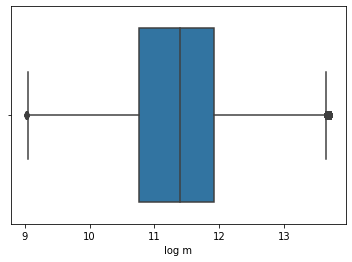

In [55]:
sns.boxplot(new_df3['log m'])

R:\Anaconda\envs\tf-gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log m', ylabel='Density'>

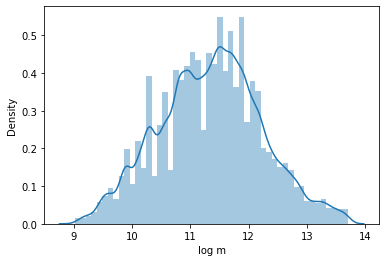

In [56]:
sns.distplot(new_df3['log m'])

In [57]:
# Hitung Quantiles untuk pembagian score
# Create the quartiles scores
quantiles_m = new_df3.quantile(q=[0.25,0.5,0.75])
quantiles_m = quantiles_m.to_dict()   

#Function
def MScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [58]:
quantiles_m

{'order_frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'order_monetary': {0.25: 47490.0, 0.5: 89000.0, 0.75: 149990.0},
 'frequency_score': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'recency': {0.25: 119.0, 0.5: 224.0, 0.75: 352.0},
 'recency_score': {0.25: 2.0, 0.5: 3.0, 0.75: 4.0},
 'log m': {0.25: 10.768274441543168,
  0.5: 11.396391648714276,
  0.75: 11.918323904189405}}

In [59]:
monetary_rank

,user_name,order_frequency,order_recency,order_monetary,date_key,frequency_score,recency,recency_score,log m
0,0037eb1ff742ee2e71ba887f65f3c6f3,1,2017-07-13,199000,20170713,1.0,417,1,12.201060
1,003800162424b7b5b3d75c9cf22a66e7,1,2018-04-01,85500,20180401,1.0,155,3,11.356272
2,00391594070baf8603f5fdc1d0c6a48c,1,2018-08-05,105000,20180805,1.0,29,4,11.561716
3,003c457932a554e4df13834237b1ed00,1,2018-01-05,129900,20180105,1.0,241,2,11.774520
4,003db7adfcdc49857b095a50191b6c9d,1,2018-05-02,524900,20180502,1.0,124,3,13.170963
...,...,...,...,...,...,...,...,...,...
95415,ffe9e41fbd14db4a7361347c56af5447,1,2018-02-11,199000,20180211,1.0,204,3,12.201060
95416,ffebb6424578e7bb153322da9d65634f,1,2017-01-16,629000,20170116,1.0,595,1,13.351887
95417,fff3a9369e4b7102fab406a334a678c3,1,2017-08-11,84900,20170811,1.0,388,1,11.349229
95418,fffcf5a5ff07b0908bd4e2dbc735a684,1,2017-06-08,1570000,20170608,1.0,452,1,14.266586


In [60]:
monetary_rank['monetary_score'] = monetary_rank['log m'].apply(MScore, args=('log m',quantiles_m,))

In [61]:
monetary_rank

,user_name,order_frequency,order_recency,order_monetary,date_key,frequency_score,recency,recency_score,log m,monetary_score
0,0037eb1ff742ee2e71ba887f65f3c6f3,1,2017-07-13,199000,20170713,1.0,417,1,12.201060,4
1,003800162424b7b5b3d75c9cf22a66e7,1,2018-04-01,85500,20180401,1.0,155,3,11.356272,2
2,00391594070baf8603f5fdc1d0c6a48c,1,2018-08-05,105000,20180805,1.0,29,4,11.561716,3
3,003c457932a554e4df13834237b1ed00,1,2018-01-05,129900,20180105,1.0,241,2,11.774520,3
4,003db7adfcdc49857b095a50191b6c9d,1,2018-05-02,524900,20180502,1.0,124,3,13.170963,4
...,...,...,...,...,...,...,...,...,...,...
95415,ffe9e41fbd14db4a7361347c56af5447,1,2018-02-11,199000,20180211,1.0,204,3,12.201060,4
95416,ffebb6424578e7bb153322da9d65634f,1,2017-01-16,629000,20170116,1.0,595,1,13.351887,4
95417,fff3a9369e4b7102fab406a334a678c3,1,2017-08-11,84900,20170811,1.0,388,1,11.349229,2
95418,fffcf5a5ff07b0908bd4e2dbc735a684,1,2017-06-08,1570000,20170608,1.0,452,1,14.266586,4


### Total Score RFM (concat)

In [62]:
rfm = monetary_rank[['user_name','recency_score','frequency_score','monetary_score']]
rfm.frequency_score = rfm.frequency_score.astype(int)
rfm['RFM_Score'] = rfm.recency_score.astype(str)+ rfm.frequency_score.astype(str) + rfm.monetary_score.astype(str)

R:\Anaconda\envs\tf-gpu\lib\site-packages\pandas\core\generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-62-187ab9dacf23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['RFM_Score'] = rfm.recency_score.astype(str)+ rfm.frequency_score.astype(str) + rfm.monetary_score.astype(str)


In [63]:
rfm.head()

,user_name,recency_score,frequency_score,monetary_score,RFM_Score
0,0037eb1ff742ee2e71ba887f65f3c6f3,1,1,4,114
1,003800162424b7b5b3d75c9cf22a66e7,3,1,2,312
2,00391594070baf8603f5fdc1d0c6a48c,4,1,3,413
3,003c457932a554e4df13834237b1ed00,2,1,3,213
4,003db7adfcdc49857b095a50191b6c9d,3,1,4,314


In [64]:
# Create human friendly RFM labels
segt_map = {
    r'[1-2][1-2][1-2]': 'Hibernating',
    r'[1-2][1-3][1-3]': 'At Risk',
    r'[1-2][1-4][1-4]': 'Can\'t loose them',
    r'411': 'New customers',
    r'[3-4][3-4][3-4]': 'Champions',
    r'[3-4][1-4][1-4]': 'Potential loyalists',
   
}
rfm['Segment'] = rfm['recency_score'].map(str) + rfm['frequency_score'].map(str) + rfm['monetary_score'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)

<ipython-input-64-7fe146091216>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['Segment'] = rfm['recency_score'].map(str) + rfm['frequency_score'].map(str) + rfm['monetary_score'].map(str)
<ipython-input-64-7fe146091216>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)


In [65]:
rfm['Segment'].value_counts()

Potential loyalists    41765
Hibernating            23898
Can't loose them       12215
At Risk                11469
New customers           5928
Champions                145
Name: Segment, dtype: int64

In [66]:
rfm_count = rfm['Segment'].value_counts()

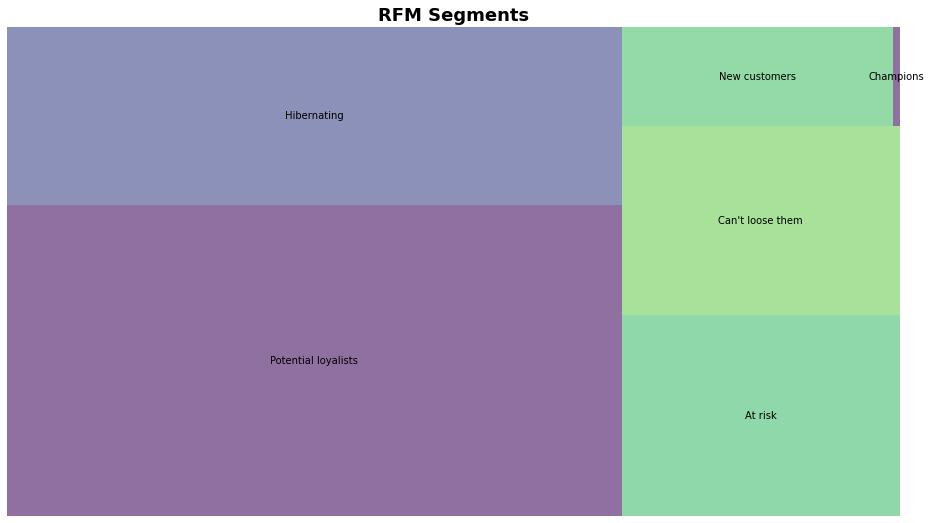

In [67]:
import squarify
import matplotlib.pyplot as plt
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_count, 
              label=['Potential loyalists',
                     'Hibernating',
                     'At risk',
                     'Can\'t loose them',
                     'New customers',
                     'Champions',
                    ], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

In [68]:
from sklearn.metrics import silhouette_score
x_rfm = rfm[['recency_score','frequency_score','monetary_score']]
silhouette_score(x_rfm, rfm['Segment'])

0.3300233538237971

In [69]:
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import OrdinalEncoder

# encoder = OrdinalEncoder()
# temp = rfm['Segment'].to_numpy().reshape(-1,1)
# segment_label = encoder.fit_transform(temp)

# u, c = np.unique(segment_label, return_counts=True)

# plt.scatter(u[:,0], u[:,1], c=segment_label , s=c)
# plt.xlabel('r', fontsize=18)
# plt.ylabel('f', fontsize=16)

# plt.show()

### Total Score RFM (Summed)

In [70]:
# Total Scores
rfm['RFM_Score_Sum'] = rfm[['recency_score','frequency_score', 'monetary_score']].sum(axis=1)
rfm.head()

<ipython-input-70-639f606a05dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['RFM_Score_Sum'] = rfm[['recency_score','frequency_score', 'monetary_score']].sum(axis=1)


,user_name,recency_score,frequency_score,monetary_score,RFM_Score,Segment,RFM_Score_Sum
0,0037eb1ff742ee2e71ba887f65f3c6f3,1,1,4,114,Can't loose them,6
1,003800162424b7b5b3d75c9cf22a66e7,3,1,2,312,Potential loyalists,6
2,00391594070baf8603f5fdc1d0c6a48c,4,1,3,413,Potential loyalists,8
3,003c457932a554e4df13834237b1ed00,2,1,3,213,At Risk,6
4,003db7adfcdc49857b095a50191b6c9d,3,1,4,314,Potential loyalists,8


In [71]:
rfm.groupby('RFM_Score_Sum')['user_name'].count()

RFM_Score_Sum
3      6039
4     11597
5     17629
6     23236
7     17898
8     12092
9      6342
10      501
11       63
12       23
Name: user_name, dtype: int64

In [72]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score_Sum'] >= 9:
        return 'Gold'
    elif ((df['RFM_Score_Sum'] >= 6) and (df['RFM_Score_Sum'] < 9)):
        return 'Silver'
    else:
        return 'Bronze'
# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm.head()

<ipython-input-72-90d3408dfc07>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)


,user_name,recency_score,frequency_score,monetary_score,RFM_Score,Segment,RFM_Score_Sum,RFM_Level
0,0037eb1ff742ee2e71ba887f65f3c6f3,1,1,4,114,Can't loose them,6,Silver
1,003800162424b7b5b3d75c9cf22a66e7,3,1,2,312,Potential loyalists,6,Silver
2,00391594070baf8603f5fdc1d0c6a48c,4,1,3,413,Potential loyalists,8,Silver
3,003c457932a554e4df13834237b1ed00,2,1,3,213,At Risk,6,Silver
4,003db7adfcdc49857b095a50191b6c9d,3,1,4,314,Potential loyalists,8,Silver


In [73]:
rfm_1 = rfm.groupby('RFM_Level')['user_name'].count()
rfm_1

RFM_Level
Bronze    35265
Gold       6929
Silver    53226
Name: user_name, dtype: int64

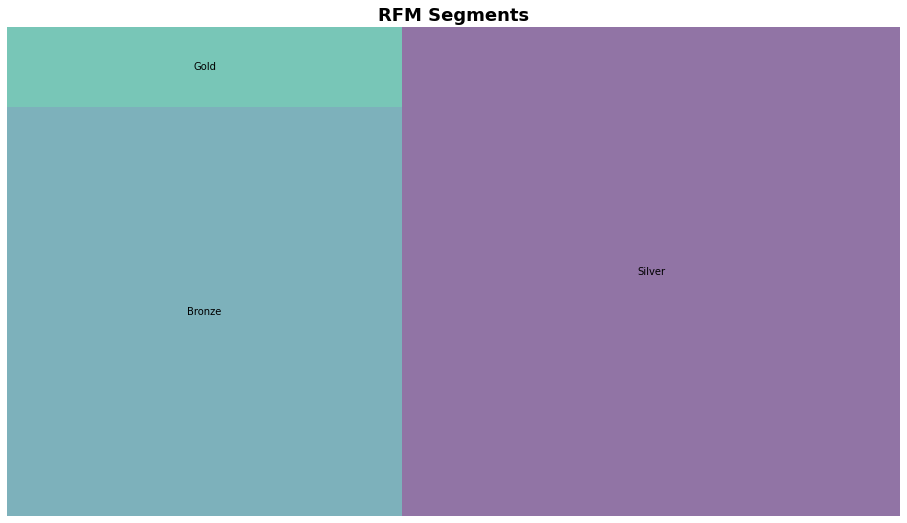

In [74]:
import squarify
import matplotlib.pyplot as plt
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_1, 
              label=['Bronze',
                     'Gold',
                     'Silver'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

## RFM Segmentation using K-Mean 

In [75]:
# Make fresh df
rfm_df3 = recency_rank[['order_frequency','order_monetary','recency']]
rfm_df3.head()

,order_frequency,order_monetary,recency
0,1,199000,417
1,1,85500,155
2,1,105000,29
3,1,129900,241
4,1,524900,124


### Pre-Process - Analyzing Data

#### Frequency

R:\Anaconda\envs\tf-gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='order_frequency', ylabel='Density'>

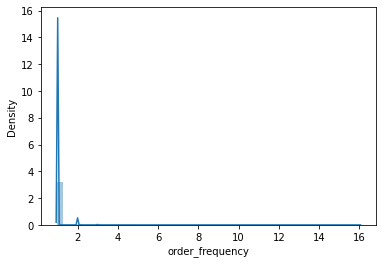

In [76]:
# Visual Analysis Using Histogram
sns.distplot(rfm_df3['order_frequency'])

R:\Anaconda\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='order_frequency'>

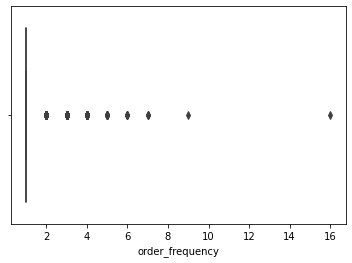

In [77]:
sns.boxplot(rfm_df3['order_frequency'])

In [78]:
rfm_df3['order_frequency'].value_counts()

1     92507
2      2673
3       192
4        29
5         9
6         5
7         3
9         1
16        1
Name: order_frequency, dtype: int64

### Pre - Process

In [79]:
rfm_df3.describe()

,order_frequency,order_monetary,recency
count,95420.000000,9.542000e+04,95420.000000
mean,1.034018,1.424402e+05,243.501457
std,0.211234,2.176564e+05,153.160850
min,1.000000,8.500000e+02,0.000000
25%,1.000000,4.790000e+04,119.000000
50%,1.000000,8.990000e+04,224.000000
75%,1.000000,1.550000e+05,353.000000
max,16.000000,1.344000e+07,729.000000


In [80]:
rfm_df3['recency'] = rfm_df3['recency'] +1

<ipython-input-80-b4f6b380ea26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df3['recency'] = rfm_df3['recency'] +1


In [81]:
# Log Transformation
rfm_log = np.log(rfm_df3)
rfm_log.describe()

,order_frequency,order_monetary,recency
count,95420.000000,95420.000000,95420.000000
mean,0.022408,11.379589,5.214814
std,0.128967,0.940014,0.872630
min,0.000000,6.745236,0.000000
25%,0.000000,10.776871,4.787492
50%,0.000000,11.406453,5.416100
75%,0.000000,11.951180,5.869297
max,2.772589,16.413746,6.593045


In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_log)
rfm_normalized = scaler.transform(rfm_log)

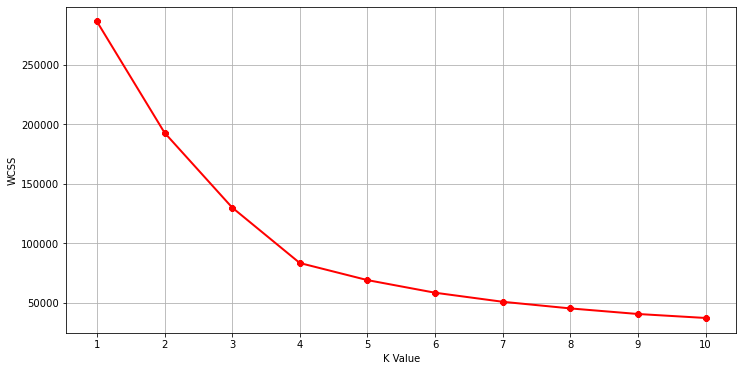

In [83]:
from sklearn.cluster import KMeans
import numpy as np
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(rfm_normalized)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [84]:
rfm_normalized

array([[-0.17375122,  0.87389698,  0.94045847],
       [-0.17375122, -0.0248059 , -0.18903612],
       [-0.17375122,  0.19374952, -2.07834513],
       ...,
       [-0.17375122, -0.03229762,  0.85806102],
       [-0.17375122,  3.07124501,  1.0326065 ],
       [-0.17375122, -0.45633446,  1.12258014]])

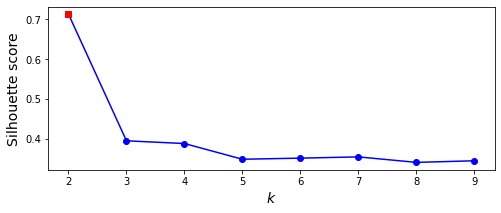

In [96]:
k_range = range(2, 10, 1)
kmeans_per_k = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(rfm_normalized)
    kmeans_per_k.append(kmeans)
    
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(rfm_normalized, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

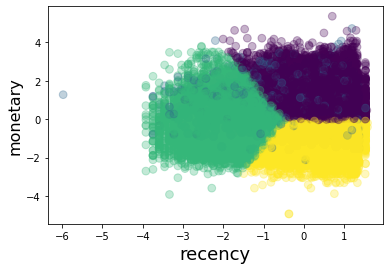

In [108]:
km = KMeans(n_clusters=4)
clusters = km.fit(rfm_normalized)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


plt.scatter(rfm_normalized[:,2], rfm_normalized[:,1], c=km.labels_ , s=60, alpha=0.3)
plt.xlabel('recency', fontsize=18)
plt.ylabel('monetary', fontsize=16)

plt.show()

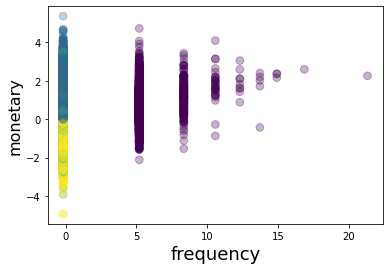

In [109]:
km = KMeans(n_clusters=4)
clusters = km.fit(rfm_normalized)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


plt.scatter(rfm_normalized[:,0], rfm_normalized[:,1], c=km.labels_ , s=60, alpha=0.3)
plt.xlabel('frequency', fontsize=18)
plt.ylabel('monetary', fontsize=16)

plt.show()

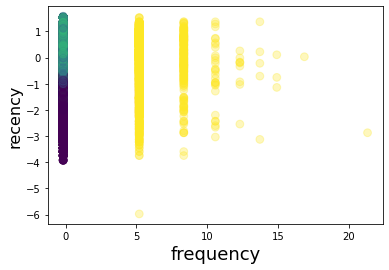

In [110]:
km = KMeans(n_clusters=4)
clusters = km.fit(rfm_normalized)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


plt.scatter(rfm_normalized[:,0], rfm_normalized[:,2], c=km.labels_ , s=60, alpha=0.3)
plt.xlabel('frequency', fontsize=18)
plt.ylabel('recency', fontsize=16)

plt.show()

In [105]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2D = pca.fit_transform(rfm_normalized)
X2D

array([[ 0.40169747, -1.03708082],
       [-0.12237   ,  0.19274074],
       [ 0.20871155,  2.0416028 ],
       ...,
       [-0.2261576 , -0.84568482],
       [ 1.93425553, -1.39432778],
       [-0.54847036, -1.05695245]])

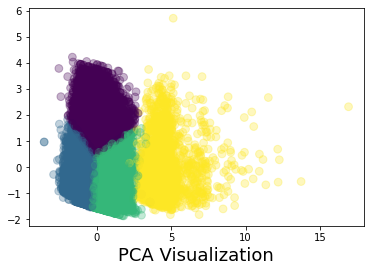

In [111]:
plt.scatter(X2D[:,0], X2D[:,1], c=km.labels_ , s=60, alpha=0.3)
plt.xlabel('PCA Visualization', fontsize=18)
plt.show()

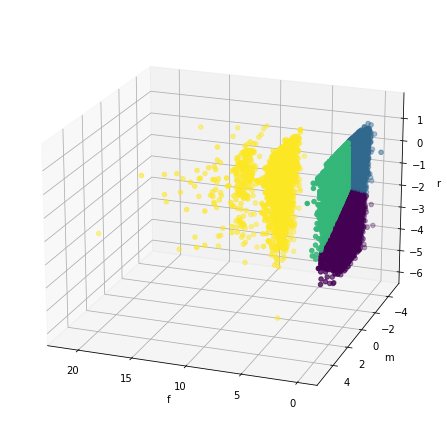

In [112]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1])

plt.cla()
ax.set_xlabel('f')
ax.set_ylabel('m')
ax.set_zlabel('r')

ax.scatter(rfm_normalized[:,0], rfm_normalized[:,1], rfm_normalized[:,2], c= km.labels_.astype(np.float))


ax.view_init(elev=20, azim=110)

In [113]:
silhouette_score(rfm_normalized, km.labels_)

0.38781838962270143

### DBSCAN

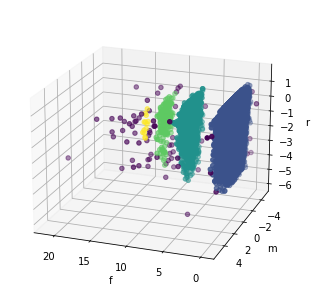

In [91]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
dbscan.fit(rfm_normalized)
db_label = dbscan.labels_

fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1])

plt.cla()
ax.set_xlabel('f')
ax.set_ylabel('m')
ax.set_zlabel('r')

ax.scatter(rfm_normalized[:,0], rfm_normalized[:,1], rfm_normalized[:,2], c= db_label)


ax.view_init(elev=20, azim=110)

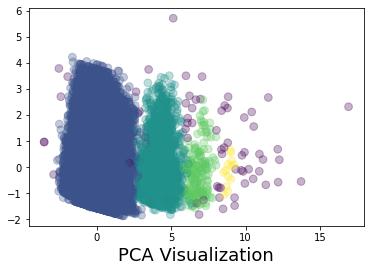

In [92]:
plt.scatter(X2D[:,0], X2D[:,1], c=db_label , s=60, alpha=0.3)
plt.xlabel('PCA Visualization', fontsize=18)
plt.show()

In [93]:
unique, counts = np.unique(db_label, return_counts=True)
dict(zip(unique, counts))

{-1: 70, 0: 92497, 1: 2666, 2: 174, 3: 13}

In [94]:
from sklearn.metrics import silhouette_score
silhouette_score(rfm_normalized, db_label)

0.6941664444270971